# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
##############################################################
import string
string.punctuation

[nltk_data] Downloading package stopwords to C:\Users\aman
[nltk_data]     raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Spam vs Ham Dataset

In [3]:
data = pd.read_csv("./Datasets/SMSSpamCollection", sep='\t', names=['label','message'])
data.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [4]:
list(data.message)[0], data.shape

('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 (5572, 2))

In [5]:
data['label'] = (data.label =='spam').astype(int)
data.head(2)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [6]:
X = data.message 
y = data.label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3733,), (1839,), (3733,), (1839,))

In [7]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return [porter.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## CountVectorizer 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer= CountVectorizer(analyzer=text_process)
bow_transformer.fit(X_train)
messages_bow_train = bow_transformer.transform(X_train)
messages_bow_test = bow_transformer.transform(X_test)

In [9]:
(messages_bow_train.todense() != 0).sum(), messages_bow_train.shape

(33657, (3733, 6595))

## TfidfTransformer

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(messages_bow_train)
tfidf_train = tfidf_transformer.transform(messages_bow_train)
tfidf_test = tfidf_transformer.transform(messages_bow_test)

In [11]:
(tfidf_train.todense() != 0).sum(), tfidf_train.shape

(33657, (3733, 6595))

In [12]:
np.sum(tfidf_train.todense() != 0)

33657

In [13]:
Vector_form_train = np.array(tfidf_train.todense())
Vector_form_test = np.array(tfidf_test.todense())
Vector_form_train.shape, Vector_form_test.shape, y_train.shape,  y_test.shape

((3733, 6595), (1839, 6595), (3733,), (1839,))

# Algorithm

## Naive Bayes Classifier

In [19]:
no_classes = len(set(y_train))
no_classes

2

In [21]:
Naive_vector_output_test = np.zeros((Vector_form_test.shape[0],no_classes))
Naive_vector_output_test.shape

(1839, 2)

In [22]:
# to work with small set

# Vector_form_test = Vector_form_test[:300,:]
# Naive_vector_output_test = Naive_vector_output_test[:300,:]

In [25]:
for i,word_list in enumerate(Vector_form_test):
    prob = []
    for c in range(no_classes):
        V = np.sum((np.sum(Vector_form_train[y_train==c], axis=0)>0).astype(int))
        prob.append( np.prod(np.power(((np.sum(Vector_form_train[y_train==c], axis=0)+1)/(np.sum(Vector_form_train[y_train==c])+V)), word_list ) ))
    print("done", i)
    Naive_vector_output_test[i] = np.array(prob)
    

done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 100
done 101
done 102
done 103
done 104
done 105
done 106
done 107
done 108
done 109
done 110
done 111
done 112
done 113
done 114
done 115
done 116
done 117
done 118
done 119
done 120
done 121
done 122
don

done 923
done 924
done 925
done 926
done 927
done 928
done 929
done 930
done 931
done 932
done 933
done 934
done 935
done 936
done 937
done 938
done 939
done 940
done 941
done 942
done 943
done 944
done 945
done 946
done 947
done 948
done 949
done 950
done 951
done 952
done 953
done 954
done 955
done 956
done 957
done 958
done 959
done 960
done 961
done 962
done 963
done 964
done 965
done 966
done 967
done 968
done 969
done 970
done 971
done 972
done 973
done 974
done 975
done 976
done 977
done 978
done 979
done 980
done 981
done 982
done 983
done 984
done 985
done 986
done 987
done 988
done 989
done 990
done 991
done 992
done 993
done 994
done 995
done 996
done 997
done 998
done 999
done 1000
done 1001
done 1002
done 1003
done 1004
done 1005
done 1006
done 1007
done 1008
done 1009
done 1010
done 1011
done 1012
done 1013
done 1014
done 1015
done 1016
done 1017
done 1018
done 1019
done 1020
done 1021
done 1022
done 1023
done 1024
done 1025
done 1026
done 1027
done 1028
done 1029
done 10

done 1750
done 1751
done 1752
done 1753
done 1754
done 1755
done 1756
done 1757
done 1758
done 1759
done 1760
done 1761
done 1762
done 1763
done 1764
done 1765
done 1766
done 1767
done 1768
done 1769
done 1770
done 1771
done 1772
done 1773
done 1774
done 1775
done 1776
done 1777
done 1778
done 1779
done 1780
done 1781
done 1782
done 1783
done 1784
done 1785
done 1786
done 1787
done 1788
done 1789
done 1790
done 1791
done 1792
done 1793
done 1794
done 1795
done 1796
done 1797
done 1798
done 1799
done 1800
done 1801
done 1802
done 1803
done 1804
done 1805
done 1806
done 1807
done 1808
done 1809
done 1810
done 1811
done 1812
done 1813
done 1814
done 1815
done 1816
done 1817
done 1818
done 1819
done 1820
done 1821
done 1822
done 1823
done 1824
done 1825
done 1826
done 1827
done 1828
done 1829
done 1830
done 1831
done 1832
done 1833
done 1834
done 1835
done 1836
done 1837
done 1838


In [26]:
Naive_vector_output_test

array([[1.67909908e-12, 1.15736985e-12],
       [7.80886374e-12, 9.17300019e-12],
       [3.06076191e-11, 1.52808535e-11],
       ...,
       [3.26552033e-07, 1.07425689e-07],
       [7.32580315e-06, 2.32627359e-05],
       [3.15020046e-12, 4.54872301e-13]])

In [27]:
Naive_predictions= Naive_vector_output_test.argmax(axis=1)

In [36]:
Naive_conf_matrix = np.zeros((no_classes,no_classes),dtype='uint16')
for i in range(no_classes):
    temp = y_test[Naive_predictions== i]
    unique, counts =np.unique(temp, return_counts=True)
    print(unique,counts)
    for h,j in enumerate(unique):
        print(i,int(j))
        Naive_conf_matrix[i,int(j)] = counts[h]

[0 1] [1280    7]
0 0
0 1
[0 1] [313 239]
1 0
1 1


<AxesSubplot:>

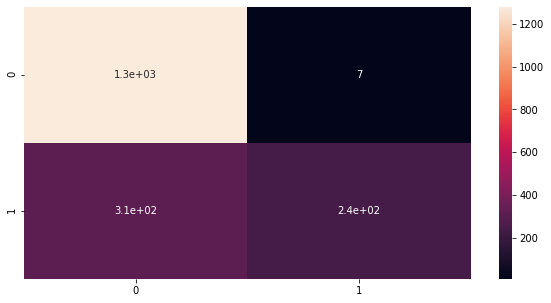

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(Naive_conf_matrix, annot= True)

In [38]:
Naive_conf_matrix

array([[1280,    7],
       [ 313,  239]], dtype=uint16)

## Done 